In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [2]:
import pandas as pd
df = pd.read_csv('https://query.data.world/s/ruo2io6oow5fbp6oiqdv7yewrr2fsr', encoding='latin')

In [3]:
df

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,552,22.0,1,44,2,21,22,14,10.0,5,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8374,552,22.0,1,44,2,21,22,13,10.0,4,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8375,552,22.0,1,44,2,21,22,19,10.0,10,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0
8376,552,22.0,1,44,2,21,22,3,10.0,16,...,8.0,5.0,7.0,6.0,7.0,9.0,5.0,9.0,5.0,6.0


In [4]:
#to get the list of all existing columns in the data frame
df.columns

Index(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position',
       'positin1', 'order',
       ...
       'attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3', 'attr5_3',
       'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3'],
      dtype='object', length=195)

In [5]:
#Check columns that don't have nan values
df.columns[df.notna().all()]

Index(['iid', 'gender', 'idg', 'condtn', 'wave', 'round', 'position', 'order',
       'partner', 'match', 'samerace', 'dec_o', 'dec'],
      dtype='object')

From the above result, we already know that we have 8378 rows and 195 colums. The number of columns is pretty high , so we will need to filter the dataset by removing irelevant columns.

Content based recommendation systems aim at recommending items to users based on the user's features and on the items' features. In our case, the users are the subjects and the items are the other users interacting with the subject. So I am going to have 2 sets of feature, Xu which is the set of user's(subject) features and Xi which is the set of item(other users or partner) features. 

I then identified these sets as follows:

*For Xu I choosed: 

    -"iid" which is the unique identifier of a subject

    -"gender" which is the gender of the subject 

    -"field (_cd)" as it is simpler than taking "field" which contains  categorical data we will have to encode later. This allows me to save some time feature engineering these categorical data

    -"undergra" as haven gone to the same school is a good common point given the context of a dating site

    -"age_o" which is the age of the subject

    -"race" race of the subject
    
    -"imprace" which states how important is the race to the subject. This column can be used in several ways, one of which is, it can help us determine if the feature "race" is important for this recommendation algorithm. If for example we have a large amount of people saying that the racial/ethnic background of the other user is not important, then we might take the decision of removing the race column from our dataset, as it will be of no importance or can reduce the performance of the recommendation system.

    -"imprelig". This feature is just like the "imprace" feature. It states how important is the religious background is to the subject.

    -"from" Where the subject comes from

    -"zipcode" Zipcode of the city the subject comes from

    -"goal". The primary of the subject when participating to this event. I think this is also an important factor expecially for a dating site as it is a strong common point between the participants and can play a big role in making the matches. The annotations here are as follows :	Seemed like a fun night out=1
    To meet new people=2
    To get a date=3
    Looking for a serious relationship=4
    To say I did it=5
    Other=6

    -"income" . Income of the subject

    -"go out". How often the user goes out: Several times a week=1
    Twice a week=2
    Once a week=3
    Twice a month=4
    Once a month=5
    Several times a year=6
    Almost never=7

    -"career (_c)" . The coded intended career of the subject.This feature is also imprtant as it removes us the pain of encoding categorical data of the feature "career". Here , 1= Lawyer 
    2= Academic/Research 
    3= Psychologist 
    4= Doctor/Medicine 
    5=Engineer 
    6= Creative Arts/Entertainment 
    7= Banking/Consulting/Finance/Marketing/Business/CEO/Entrepreneur/Admin 
    8= Real Estate 
    9= International/Humanitarian Affairs 
    10= Undecided 
    11=Social Work
    12=Speech Pathology
    13=Politics
    14=Pro sports/Athletics
    15=Other
    16=Journalism
    17=Architecture
*For Xi, I choosed:

    -"pid". The partner's unique identifier
    -"race_o " .The race of the partner 

    -Partner's stated preferences at the beginning of the experiment:
    "pf_o_att" importance of attractiveness
    "pf_o_sin" importance of Sincerity
    "pf_o_int" importance of intelligence
    "pf_o_fun" importance of being fun
    "pf_o_amb" importance of being Ambitious
    "pf_o_sha" importance of having shared interests/hobbies

I think columns "match" and "dec_o" will also be important as they can be used as references to say if the subject liked a partner or not, hence can maybe be used in the calculating the cost function while building the recommendation system.

As for Collaborative filtering, I decide to use ratings by parter the night of the event ("attr_o" , "sinc_o" , "intel_o" , "fun_o" , "amb_o"  and  "shar_o"). I choosed them because, as collaborative filtering is based on the ratings of users who gave same same ratings on certain items, the other participants that a partner likes may be recommended to a subject if they have the same ratings on some other users.
I'll also take "int_corr" , which is the correlation between subject’s and partner’s ratings of interests for the same reason as the previously stated columns.

I will also take the columns "wave", as these attributes' significances vary across the different waves


So I will create a new dataframe below containing these selected features

In [6]:
selected_features_CB=['wave','iid','pid','gender','field_cd','undergra','age','age_o','race','race_o','imprace','imprelig','from','zipcode','goal','income','career_c','pf_o_att','pf_o_sin','pf_o_int','pf_o_fun','pf_o_amb','pf_o_sha','match','dec_o']
selected_features_Cf=['wave','iid','pid','gender','field_cd','undergra','age','age_o','race','race_o','imprace','imprelig','from','zipcode','goal','income','career_c','pf_o_att','pf_o_sin','pf_o_int','pf_o_fun','pf_o_amb','pf_o_sha','attr_o','sinc_o','intel_o','fun_o','amb_o','shar_o','match','dec_o']

In [8]:
cb_df=df[selected_features_CB]
cb_df

,wave,iid,pid,gender,field_cd,undergra,age,age_o,race,race_o,...,income,career_c,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,match,dec_o
0,1,1,11.0,0,1.0,NaN,21.0,27.0,4.0,2.0,...,"69,487.00",NaN,35.0,20.0,20.0,20.0,0.0,5.0,0,0
1,1,1,12.0,0,1.0,NaN,21.0,22.0,4.0,2.0,...,"69,487.00",NaN,60.0,0.0,0.0,40.0,0.0,0.0,0,0
2,1,1,13.0,0,1.0,NaN,21.0,22.0,4.0,4.0,...,"69,487.00",NaN,19.0,18.0,19.0,18.0,14.0,12.0,1,1
3,1,1,14.0,0,1.0,NaN,21.0,23.0,4.0,2.0,...,"69,487.00",NaN,30.0,5.0,15.0,40.0,5.0,5.0,1,1
4,1,1,15.0,0,1.0,NaN,21.0,24.0,4.0,3.0,...,"69,487.00",NaN,30.0,10.0,20.0,10.0,10.0,20.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,21,552,526.0,1,18.0,"Ecole Normale Suprieure, Paris",25.0,26.0,2.0,3.0,...,NaN,15.0,10.0,10.0,30.0,20.0,10.0,15.0,0,1
8374,21,552,527.0,1,18.0,"Ecole Normale Suprieure, Paris",25.0,24.0,2.0,6.0,...,NaN,15.0,50.0,20.0,10.0,5.0,10.0,5.0,0,0
8375,21,552,528.0,1,18.0,"Ecole Normale Suprieure, Paris",25.0,29.0,2.0,3.0,...,NaN,15.0,40.0,10.0,30.0,10.0,10.0,NaN,0,0
8376,21,552,529.0,1,18.0,"Ecole Normale Suprieure, Paris",25.0,22.0,2.0,4.0,...,NaN,15.0,10.0,25.0,25.0,10.0,10.0,20.0,0,1


From the above, we can deduce that there are 552 people who took part to this experiment. We check this number in the cell below

In [52]:
cb_df['iid'].nunique()

551

In [53]:
cb_df['pid'].nunique()

551

From the above cells, we see that there are instead 551 participants. We can also conclude that all the participants occupied both roles in the experiment i.e. the user(subject) and the item(partner)

First, I want to see approximately how many missing values we have. This can help in decide on what to do during the feature engineering step. If I'll have to remove some columns or rows, replace values instead ...

In [54]:
cb_df.isnull().sum()

wave           0
iid            0
pid           10
gender         0
field_cd      82
undergra    3464
age           95
age_o        104
race          63
race_o        73
imprace       79
imprelig      79
from          79
zipcode     1064
goal          79
income      4099
career_c     138
pf_o_att      89
pf_o_sin      89
pf_o_int      89
pf_o_fun      98
pf_o_amb     107
pf_o_sha     129
match          0
dec_o          0
dtype: int64

Remember, the total number of rows is 8378, having too much missing values in a column can lead to this columns not being useful. Sometimes, replacing these missing values might create a bias towards the replaced values. For example, the column "income" has 4099 missing values. This is almost half of the values of the column, therefore , maybe replacing these missing values with the average income might cause some bias towards this average, as this value will be in almost 50 % of the hole column data. Deleting the empty rows is not an option too, as it might lead to the deletion of sunjects and parters which is of significance importance. It is important to state that in the description of the colmns of the dataset, they say that the income column is the median household income based on zipcode using the Census Bureau website:
http://venus.census.gov/cdrom/lookup/CMD=LIST/DB=C90STF3B/LEV=ZIP. This means that this column is not specific to subjects but to the zip code, implying that, if we have the zipcode, we can have the income. I hence decide to delete this column because it has a lot of missing values and is directly related to zipcode.


In [55]:
cb_df=cb_df.drop(axis=1, columns='income')
cb_df

,wave,iid,pid,gender,field_cd,undergra,age,age_o,race,race_o,...,goal,career_c,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,match,dec_o
0,1,1,11.0,0,1.0,NaN,21.0,27.0,4.0,2.0,...,2.0,NaN,35.0,20.0,20.0,20.0,0.0,5.0,0,0
1,1,1,12.0,0,1.0,NaN,21.0,22.0,4.0,2.0,...,2.0,NaN,60.0,0.0,0.0,40.0,0.0,0.0,0,0
2,1,1,13.0,0,1.0,NaN,21.0,22.0,4.0,4.0,...,2.0,NaN,19.0,18.0,19.0,18.0,14.0,12.0,1,1
3,1,1,14.0,0,1.0,NaN,21.0,23.0,4.0,2.0,...,2.0,NaN,30.0,5.0,15.0,40.0,5.0,5.0,1,1
4,1,1,15.0,0,1.0,NaN,21.0,24.0,4.0,3.0,...,2.0,NaN,30.0,10.0,20.0,10.0,10.0,20.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373,21,552,526.0,1,18.0,"Ecole Normale Suprieure, Paris",25.0,26.0,2.0,3.0,...,1.0,15.0,10.0,10.0,30.0,20.0,10.0,15.0,0,1
8374,21,552,527.0,1,18.0,"Ecole Normale Suprieure, Paris",25.0,24.0,2.0,6.0,...,1.0,15.0,50.0,20.0,10.0,5.0,10.0,5.0,0,0
8375,21,552,528.0,1,18.0,"Ecole Normale Suprieure, Paris",25.0,29.0,2.0,3.0,...,1.0,15.0,40.0,10.0,30.0,10.0,10.0,NaN,0,0
8376,21,552,529.0,1,18.0,"Ecole Normale Suprieure, Paris",25.0,22.0,2.0,4.0,...,1.0,15.0,10.0,25.0,25.0,10.0,10.0,20.0,0,1


Another column that has too many missing values is the 'undergra' column. I will analyse it below to take a convenient decision about what to do with that. 

In [56]:
cb_df['undergra'].nunique()

241

In [57]:
# To get the top 10 most common undergraduate Schools of the subjects
n = 10
cb_df['undergra'].value_counts().index.tolist()[:n]

['UC Berkeley',
 'Harvard',
 'Columbia',
 'Yale',
 'NYU',
 'Brown',
 'UCLA',
 'Cornell University',
 'Smith College',
 'Tufts University']

In [58]:
# corr = cb_df['zipcode'].corr(cb_df['income'])
# print ("Correlation between zipcode and income is: ", round(corr, 2))
print(cb_df.corr())

              wave       iid       pid    gender  field_cd       age  \
wave      1.000000  0.996713  0.996712 -0.001264  0.133718  0.095184   
iid       0.996713  1.000000  0.992968  0.051937  0.125793  0.101278   
pid       0.996712  0.992968  1.000000 -0.053183  0.132824  0.090583   
gender   -0.001264  0.051937 -0.053183  1.000000 -0.080728  0.070574   
field_cd  0.133718  0.125793  0.132824 -0.080728  1.000000  0.138069   
age       0.095184  0.101278  0.090583  0.070574  0.138069  1.000000   
age_o     0.093570  0.090583  0.099784 -0.072408  0.067408  0.100673   
race      0.067506  0.061119  0.065740 -0.018857  0.026112 -0.058010   
race_o    0.068064  0.065740  0.061642  0.019315  0.005045  0.007802   
imprace  -0.030955 -0.038666 -0.027770 -0.113211 -0.034245 -0.147194   
imprelig -0.062908 -0.068920 -0.049824 -0.199148 -0.074747 -0.054876   
goal     -0.057253 -0.052643 -0.053747  0.025949 -0.072600  0.089560   
career_c  0.152429  0.157115  0.154519 -0.006251  0.353927  0.01

The above cell Shows correlation between some features, which might help in this exploratory analysis. Some of them are obvious, for example 'match' and 'dec_o' are correlated as 'dec_o' plays a 50 % in the output given in 'match'

I also analyse the column "Wave", to see the number of interactions between partners it contains. 

In [59]:
cb_df['wave'].value_counts()

21    968
11    882
9     800
14    720
15    684
4     648
2     608
7     512
19    450
12    392
17    280
3     200
8     200
1     200
5     190
13    180
10    162
16     96
20     84
18     72
6      50
Name: wave, dtype: int64

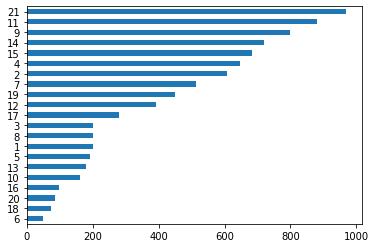

In [60]:
# df['wave'].bar()
cb_df['wave'].value_counts().sort_values().plot(kind = 'barh')

In [28]:
def plot_barchart(dataset, attribute):
  dataset[attribute].unique()
  sns.countplot(x=attribute, data=dataset)
  plt.xticks(rotation=90)


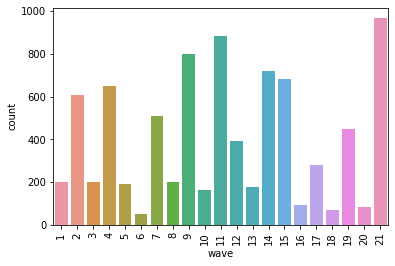

In [61]:
plot_barchart(cb_df,'wave')

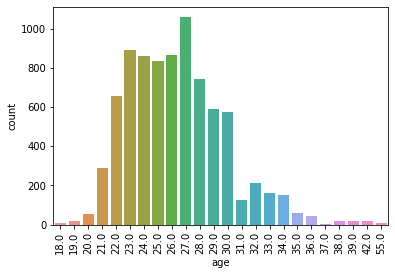

In [62]:
plot_barchart(cb_df,'age')

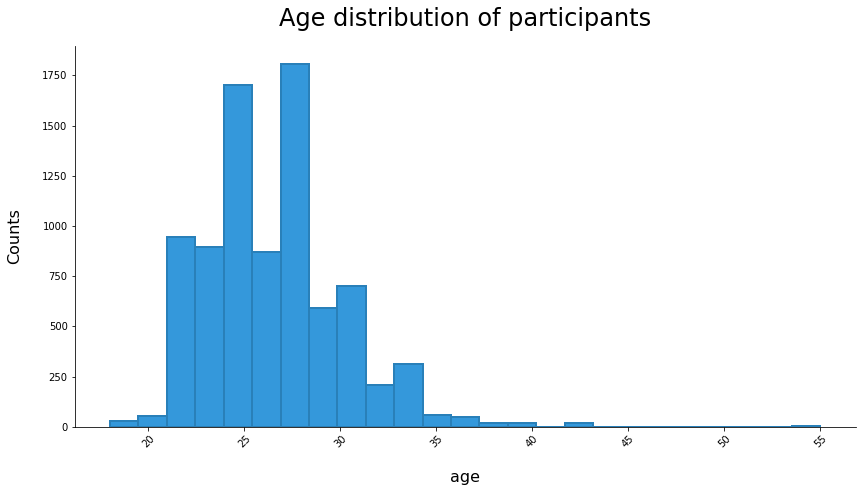

In [63]:
def make_histogram(dataset, attribute, bins=25, bar_color='#3498db', edge_color='#2980b9', title='Title', xlab='X', ylab='Y', sort_index=False):
        
    fig, ax = plt.subplots(figsize=(14, 7))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_title(title, fontsize=24, pad=20)
    ax.set_xlabel(xlab, fontsize=16, labelpad=20)
    ax.set_ylabel(ylab, fontsize=16, labelpad=20)
    
    plt.hist(dataset[attribute], bins=bins, color=bar_color, ec=edge_color, linewidth=2)
    
    plt.xticks(rotation=45)
    
    
make_histogram(cb_df, 'age', title='Age distribution of participants', xlab='age', ylab='Counts')

From the above plots, we can see that age of participants mostly varies between 21 and 30 years old 

Another important feature can be the "imprace" column. It can help us determine the importance of race to out algorithm. If a conciderable number of people say race is not important, then we might decide to not the "race" and "race_o" colomns for our recommendation system as a great majority of subjects do not take it as a criteria when selecting/rating a partner.

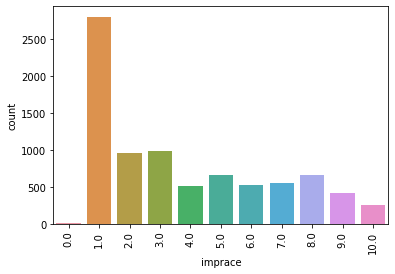

In [64]:
plot_barchart(cb_df,'imprace')

We can see that mos peolpe are saying that race is not that much important to them. Nevertheless, we still have enough people for whom it is important, so we will keep the columns "race" and "race_o"

I also examine the column "race", to see what proportion of race we have the most in our dataset. From the cell below, we see that a good majority of subjects are European/Caucasian-American followed by Asian/Pacific Islander/Asian-American.

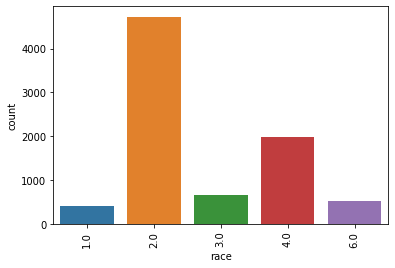

In [65]:
plot_barchart(cb_df,'race')

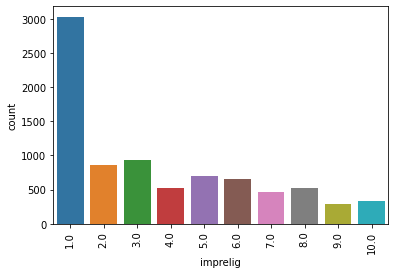

In [66]:
#Importance of religion
plot_barchart(cb_df,'imprelig')

The above cell shows that most people dont give that much importance to religious back groud, but still, a certain portion of people give an importance to it.

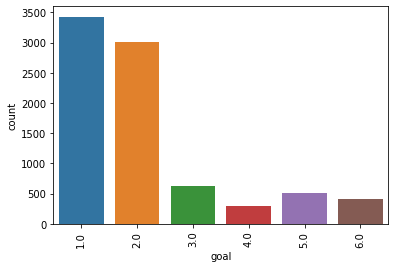

In [67]:
plot_barchart(cb_df,'goal')

The cell above shows that most people are there because the experiment seemed like a fun night out 

It might also be interesting to see the most rated subjects in the dataset or the subjects with the highest number of likes/positive answer from partner.

To do this, I create a new dataframe containing only 2 columns for visualisation sake, "iid" and "dec_o"

In [68]:
rating_df=cb_df[['iid','dec_o']]
rating_df

,iid,dec_o
0,1,0
1,1,0
2,1,1
3,1,1
4,1,1
...,...,...
8373,552,1
8374,552,0
8375,552,0
8376,552,1


In [26]:
new_rating_df=rating_df.groupby(['iid']).sum().sort_values(by='dec_o', ascending=False)
new_rating_df[:11]


,dec_o
iid,
268,20
208,20
207,19
366,18
200,17
266,17
99,17
389,17
197,16


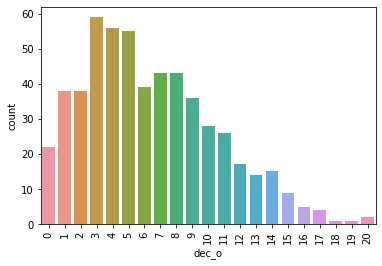

In [30]:
plot_barchart(new_rating_df,'dec_o')

We can see from the above that the subjects with the highest number of likes are those with iid 268 and 208 with 20 likes each. The Bar chart shows that the most subjects recieve between 3 to 8 likes from other participants

It might as well be interesting to know which attributes are the most important amongst attractiveness, sincerity, intelligence, fun, ambitions and having shared interests. I will create a new dataframe with these columns

In [34]:
atribute_df=cb_df[['wave','iid','pf_o_att','pf_o_sin','pf_o_int','pf_o_fun','pf_o_amb','pf_o_sha']]
atribute_df

,wave,iid,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha
0,1,1,35.0,20.0,20.0,20.0,0.0,5.0
1,1,1,60.0,0.0,0.0,40.0,0.0,0.0
2,1,1,19.0,18.0,19.0,18.0,14.0,12.0
3,1,1,30.0,5.0,15.0,40.0,5.0,5.0
4,1,1,30.0,10.0,20.0,10.0,10.0,20.0
...,...,...,...,...,...,...,...,...
8373,21,552,10.0,10.0,30.0,20.0,10.0,15.0
8374,21,552,50.0,20.0,10.0,5.0,10.0,5.0
8375,21,552,40.0,10.0,30.0,10.0,10.0,NaN
8376,21,552,10.0,25.0,25.0,10.0,10.0,20.0


In [33]:
atribute_df.describe()

,iid,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha
count,8378.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000
mean,283.675937,22.495347,17.396867,20.270759,17.459714,10.685375,11.845930
std,158.583367,12.569802,7.044003,6.782895,6.085526,6.126544,6.362746
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,154.000000,15.000000,15.000000,17.390000,15.000000,5.000000,9.520000
50%,281.000000,20.000000,18.370000,20.000000,18.000000,10.000000,10.640000
75%,407.000000,25.000000,20.000000,23.810000,20.000000,15.000000,16.000000
max,552.000000,100.000000,60.000000,50.000000,50.000000,53.000000,30.000000


I will now split the waves into 2, as the atribute values in them have different significances according to the feature/columns description documen. Wave 1 to 21 excluding waves 6,7,8 and 9 in one dataframe called "wave1_21", and the excluded waves in another dataframe called "wave6_9".

In [36]:
wave6_9=atribute_df[atribute_df['wave'].isin([6,7,8,9])]
wave6_9

,wave,iid,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha
1846,6,132,17.39,17.39,15.22,17.39,13.04,19.57
1847,6,132,20.00,20.00,20.00,20.00,6.67,13.33
1848,6,132,18.75,16.67,18.75,20.83,12.50,12.50
1849,6,132,18.60,16.28,18.60,18.60,11.63,16.28
1850,6,132,20.83,20.83,16.67,16.67,6.25,18.75
...,...,...,...,...,...,...,...,...
3403,9,233,13.04,21.74,17.39,17.39,15.22,15.22
3404,9,233,20.00,15.56,20.00,15.56,11.11,17.78
3405,9,233,16.36,16.36,18.18,18.18,16.36,14.55
3406,9,233,14.29,18.37,18.37,16.33,18.37,14.29


In [37]:
wave6_9.describe()

,wave,iid,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha
count,1562.000000,1562.000000,1557.000000,1557.00000,1557.000000,1557.000000,1557.000000,1557.000000
mean,8.120359,188.838028,16.158304,17.82194,18.990886,17.910328,14.733789,14.386532
std,0.976788,28.739971,3.515382,2.75362,1.993004,2.440198,4.180549,3.946962
min,6.000000,132.000000,6.670000,5.13000,14.710000,12.500000,2.330000,2.270000
25%,7.000000,163.000000,14.290000,16.67000,17.390000,16.670000,13.040000,12.500000
50%,9.000000,194.000000,16.000000,17.78000,18.870000,17.950000,15.690000,14.890000
75%,9.000000,214.000000,18.000000,19.44000,20.000000,19.230000,17.780000,17.070000
max,9.000000,233.000000,27.780000,23.81000,23.810000,27.780000,20.590000,23.810000


In [50]:
wave1_21= atribute_df[atribute_df.wave.isin([6,7,8,9]) == False]
# df.drop(df.loc[df['line_race']==0].index, inplace=True)
wave1_21

,wave,iid,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha
0,1,1,35.0,20.0,20.0,20.0,0.0,5.0
1,1,1,60.0,0.0,0.0,40.0,0.0,0.0
2,1,1,19.0,18.0,19.0,18.0,14.0,12.0
3,1,1,30.0,5.0,15.0,40.0,5.0,5.0
4,1,1,30.0,10.0,20.0,10.0,10.0,20.0
...,...,...,...,...,...,...,...,...
8373,21,552,10.0,10.0,30.0,20.0,10.0,15.0
8374,21,552,50.0,20.0,10.0,5.0,10.0,5.0
8375,21,552,40.0,10.0,30.0,10.0,10.0,NaN
8376,21,552,10.0,25.0,25.0,10.0,10.0,20.0


In [51]:
wave1_21.describe()

,wave,iid,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha
count,6816.000000,6816.000000,6732.000000,6732.000000,6732.000000,6723.000000,6714.000000,6692.000000
mean,12.091256,305.409624,23.961000,17.298555,20.566772,17.355355,9.746534,11.254819
std,6.405624,167.897804,13.425856,7.700079,7.434063,6.646454,6.124239,6.665661
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,116.000000,15.000000,10.000000,18.000000,14.000000,5.000000,5.000000
50%,13.000000,335.000000,20.000000,20.000000,20.000000,18.000000,10.000000,10.000000
75%,17.000000,440.250000,30.000000,20.000000,25.000000,20.000000,15.000000,15.000000
max,21.000000,552.000000,100.000000,60.000000,50.000000,50.000000,53.000000,30.000000


For the people in wave6_9 we see from the mean that on average, the  most important attribute is intellignce followed by fun. On the other hand, for people in wave1_21, on average the most important attribute is attraction followed by sincerity

In [44]:
cf_df=df[selected_features_Cf]
cf_df.head(10)

,wave,iid,pid,gender,field_cd,undergra,age,age_o,race,race_o,...,pf_o_amb,pf_o_sha,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,match,dec_o
0,1,1,11.0,0,1.0,NaN,21.0,27.0,4.0,2.0,...,0.00,5.00,6.0,8.0,8.0,8.0,8.0,6.0,0,0
1,1,1,12.0,0,1.0,NaN,21.0,22.0,4.0,2.0,...,0.00,0.00,7.0,8.0,10.0,7.0,7.0,5.0,0,0
2,1,1,13.0,0,1.0,NaN,21.0,22.0,4.0,4.0,...,14.00,12.00,10.0,10.0,10.0,10.0,10.0,10.0,1,1
3,1,1,14.0,0,1.0,NaN,21.0,23.0,4.0,2.0,...,5.00,5.00,7.0,8.0,9.0,8.0,9.0,8.0,1,1
4,1,1,15.0,0,1.0,NaN,21.0,24.0,4.0,3.0,...,10.00,20.00,8.0,7.0,9.0,6.0,9.0,7.0,1,1
5,1,1,16.0,0,1.0,NaN,21.0,25.0,4.0,2.0,...,0.00,10.00,7.0,7.0,8.0,8.0,7.0,7.0,0,1
6,1,1,17.0,0,1.0,NaN,21.0,30.0,4.0,2.0,...,5.00,10.00,3.0,6.0,7.0,5.0,8.0,7.0,0,0
7,1,1,18.0,0,1.0,NaN,21.0,27.0,4.0,2.0,...,11.11,22.22,6.0,7.0,5.0,6.0,8.0,6.0,0,0
8,1,1,19.0,0,1.0,NaN,21.0,28.0,4.0,2.0,...,0.00,15.00,7.0,7.0,8.0,8.0,8.0,9.0,1,1
9,1,1,20.0,0,1.0,NaN,21.0,24.0,4.0,2.0,...,0.00,0.00,6.0,6.0,6.0,6.0,6.0,6.0,0,0


We will then save the cb_filtering dataset into a new csv file that will be used for the content based recommender system in the next staps of the exercise

In [70]:
cb_df.to_csv('filtered_cb_df.csv') #saving the cb_df into a csv file

In [71]:
cf_df.to_csv('filtered_cf_df.csv') #saving the cf_df into a .csv file